# **Import** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import ser
import lib_tree
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## 2 classes

# Loading Datasets

In [ ]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)

In [ ]:
train= pd.read_csv("train_data.csv")
test= pd.read_csv("test_data.csv")
train.loc[train[train.labels.isin([ 2.0])].index, 'labels']=1.0
test.loc[test[test.labels.isin([ 2.0])].index, 'labels']=1.0
yt = train.labels
Xt= train.drop([ 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.9, stratify = yt, random_state=42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()
y_test_t = test.labels
X_test_t = test.drop([ 'labels'], axis=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(Xs, ys)

## IMBSER SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train_t, y_train_t)


In [ ]:
SER_smote = copy.deepcopy(clf)
ser.SER(0, SER_smote, X_resampled, y_resampled, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_smote.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

ROC AUC score: 0.9138425990757596
precision: [0.96216216 0.81707317]
recall; [0.92227979 0.90540541]
fscore: [0.94179894 0.85897436]
support: [193  74]
accuracy: 0.9176029962546817
Confusion Matrix ser smote:
[[178  15]
 [  7  67]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ROC AUC score: 0.9205993558325164
precision: [0.96216216 0.81707317]
recall; [0.92227979 0.90540541]
fscore: [0.94179894 0.85897436]
support: [193  74]
accuracy: 0.9213483146067416
Confusion Matrix ser smote:
[[178  15]
 [  6  68]]


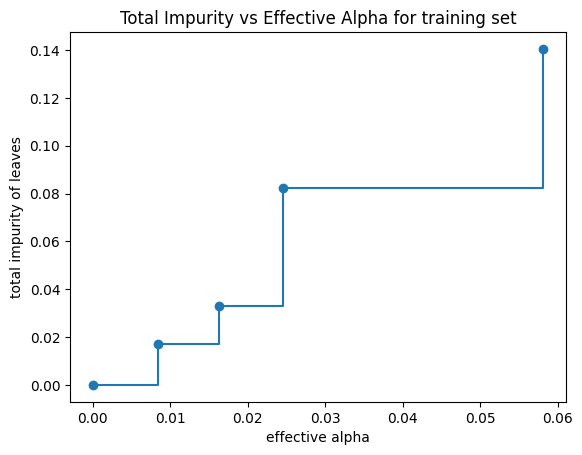

In [ ]:

# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_smote.cost_complexity_pruning_path( X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_smote = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth =3)

# Re-fit the tree
SER_smote.fit( X_resampled, y_resampled)

y_pred = SER_smote.predict(X_test_t)
roc = roc_auc_score(y_test_t, y_pred)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

In [ ]:
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('weighted f1 score:', f1_weighted)

weighted f1 score: 0.9226638490563747


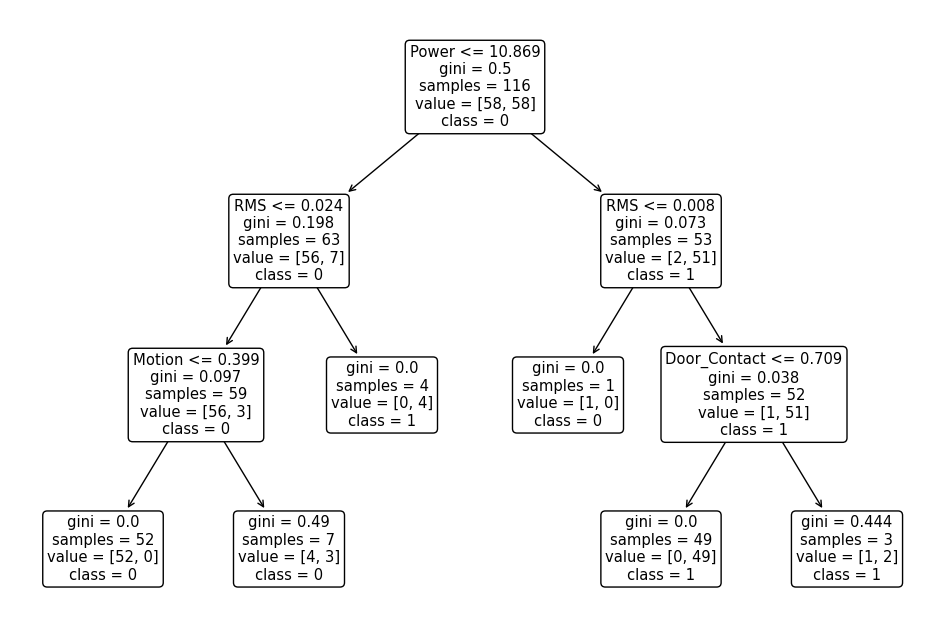

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_smote, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

## IMBSER CLUSTERCENTROIDS

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0),  sampling_strategy='not majority'
)
X_res, y_res = cc.fit_resample(X_train_t, y_train_t)
SER_cluster = copy.deepcopy(clf)
ser.SERRR(0, SER_cluster, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy: 0.8801498127340824
weighted f1 score: 0.8737384919097434
ROC AUC score: 0.8087802828735472
precision: [0.87793427 0.88888889]
recall; [0.96891192 0.64864865]
fscore: [0.92118227 0.75      ]
support: [193  74]
Confusion Matrix:
[[187   6]
 [ 26  48]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy: 0.9138576779026217
weighted f1 score: 0.9161225388230146
ROC AUC score: 0.8695910936843578
precision: [0.91666667 0.9047619 ]
recall; [0.96891192 0.77027027]
fscore: [0.94206549 0.83211679]
support: [193  74]
Confusion Matrix imb ser ClusterCentroids:
[[187   6]
 [ 17  57]]


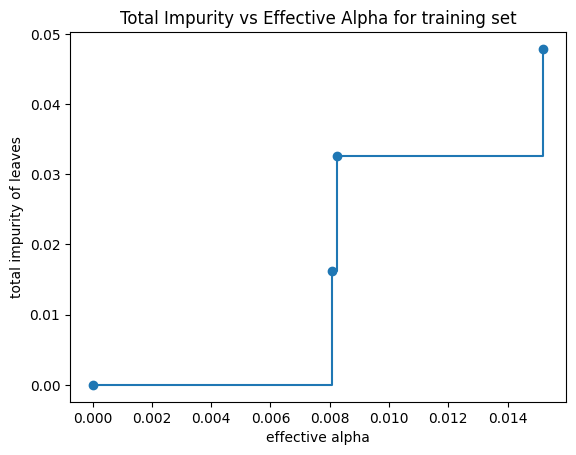

In [ ]:
path = SER_cluster.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_cluster = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth = 3)

# Re-fit the tree
SER_cluster.fit(X_res, y_res)

y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
f1_weighted = f1_score(y_pred,y_test_t, average='weighted')
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser ClusterCentroids:")
print(cm)

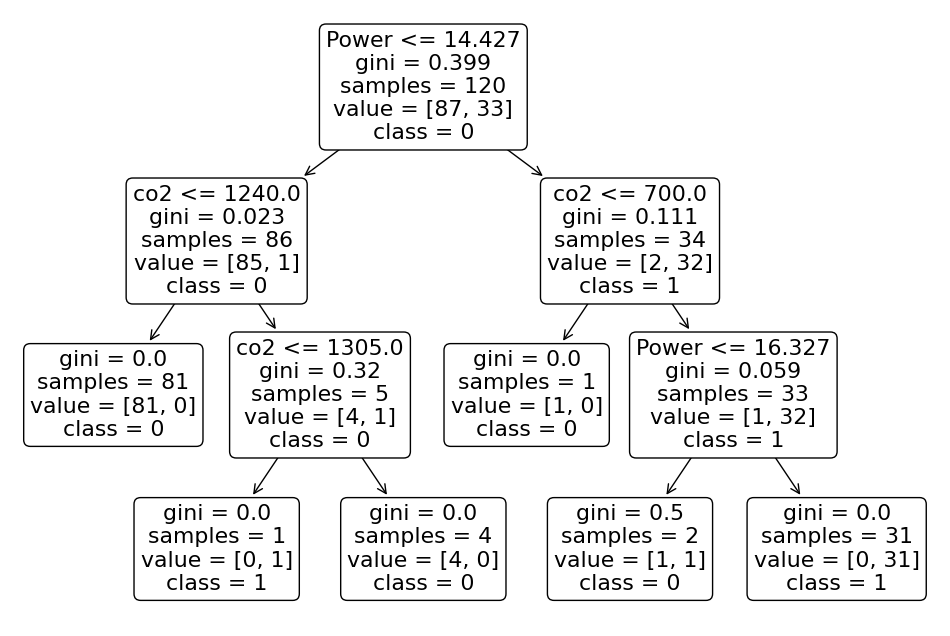

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_cluster, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

## IMBSER SMOTETOMEK

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_t, y_train_t)

SER_tomek = copy.deepcopy(clf)
ser.SER(0, SER_tomek, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_tomek.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser smotetomek:")
print(cm)


accuracy: 0.9138576779026217
weighted f1 score: 0.9136759717968422
ROC AUC score: 0.890421509592494
precision: [0.93814433 0.84931507]
recall; [0.94300518 0.83783784]
fscore: [0.94056848 0.84353741]
support: [193  74]
Confusion Matrix imb ser smotetomek:
[[182  11]
 [ 12  62]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy: 0.9363295880149812
weighted f1 score: 0.9359164443081023
ROC AUC score: 0.9142977174065257
precision: [0.94897959 0.90140845]
recall; [0.96373057 0.86486486]
fscore: [0.9562982  0.88275862]
support: [193  74]
Confusion Matrix ser smotetomek:
[[186   7]
 [ 10  64]]


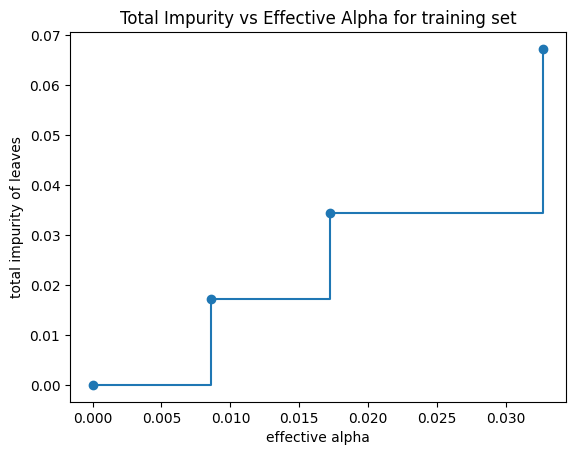

In [ ]:
# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_tomek.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_tomekk = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth=3)

# Re-fit the tree
SER_tomekk.fit(X_res, y_res)

y_pred = SER_tomekk.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smotetomek:")
print(cm)

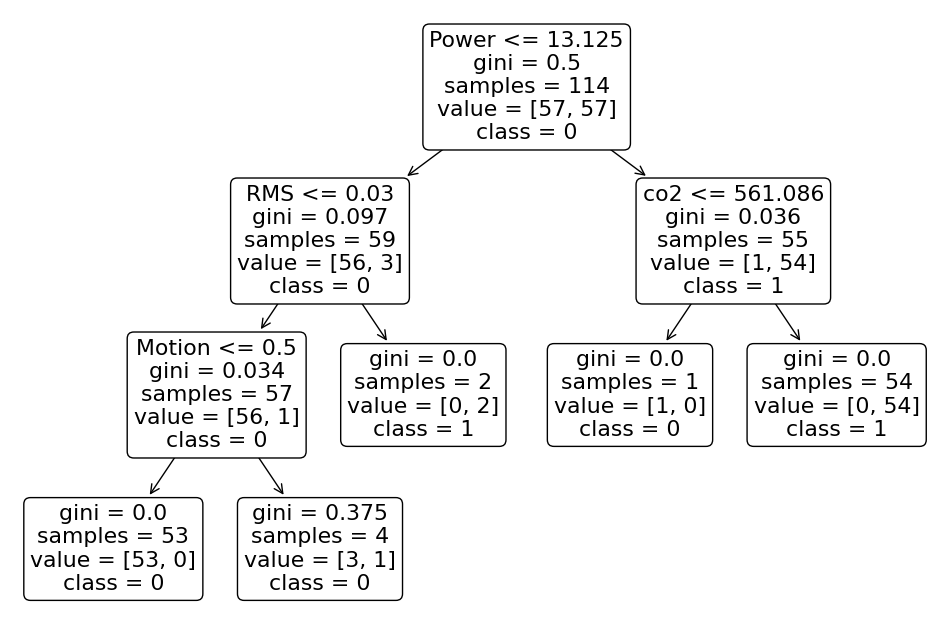

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_tomekk, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()